In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
names=['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

adult_df = pd.read_csv('adult.csv',names = names)
adult_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
### 데이터 null값 파악 ###
print('** adult 정보 ** \n')
print(adult_df.info())

** adult 정보 ** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [11]:
print('**성별** \n',adult_df['sex'].value_counts())
print('\n**인종** \n',adult_df['race'].value_counts())
print('\n**수입** \n',adult_df['income'].value_counts())
print('\n**나라** \n',adult_df['native-country'].value_counts())

**성별** 
  Male      21790
 Female    10771
Name: sex, dtype: int64

**인종** 
  White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

**수입** 
  <=50K    24720
 >50K      7841
Name: income, dtype: int64

**나라** 
  United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan  

In [12]:
### 국가 앞글자만 자름 ###
adult_df['native-country'] = adult_df['native-country'].str[1:2]
print(adult_df['native-country'].head(6))

0    U
1    U
2    U
3    U
4    C
5    U
Name: native-country, dtype: object


In [13]:
### 성별-수입 ###
adult_df.groupby(['sex','income'])['income'].count()

sex      income
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
Name: income, dtype: int64

In [14]:
### 인종-수입 ###
adult_df.groupby(['race','income'])['income'].count()

race                 income
 Amer-Indian-Eskimo   <=50K      275
                      >50K        36
 Asian-Pac-Islander   <=50K      763
                      >50K       276
 Black                <=50K     2737
                      >50K       387
 Other                <=50K      246
                      >50K        25
 White                <=50K    20699
                      >50K      7117
Name: income, dtype: int64

In [15]:
### 필요없다고 판단되는 것 drop ###
adult_df.drop(['workclass','education','fnlwgt','marital-status'],axis=1,inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
# 레이블 인코딩 수행. 
    
names = ['race','sex','occupation','native-country','income','relationship']
for n in names:
    le = LabelEncoder()
    le = le.fit(adult_df[n])
    adult_df[n] = le.transform(adult_df[n])

adult_df.head()

,age,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,13,1,1,4,1,2174,0,40,16,0
1,50,13,4,0,4,1,0,0,13,16,0
2,38,9,6,1,4,1,0,0,40,16,0
3,53,7,6,0,2,1,0,0,40,16,0
4,28,13,10,5,2,0,0,0,40,1,0


In [17]:
### 인코딩 후 확인 ###
print(adult_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   education-num   32561 non-null  int64
 2   occupation      32561 non-null  int32
 3   relationship    32561 non-null  int32
 4   race            32561 non-null  int32
 5   sex             32561 non-null  int32
 6   capital-gain    32561 non-null  int64
 7   capital-loss    32561 non-null  int64
 8   hours-per-week  32561 non-null  int64
 9   native-country  32561 non-null  int32
 10  income          32561 non-null  int32
dtypes: int32(6), int64(5)
memory usage: 2.0 MB
None


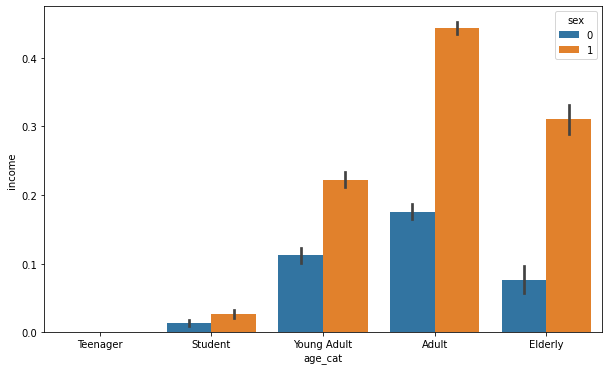

In [18]:
def get_category(age):
    cat = ''
    if age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
adult_df['age_cat'] = adult_df['age'].apply(lambda x : get_category(x))
sns.barplot(x='age_cat', y = 'income', hue='sex', data=adult_df, order=group_names)
adult_df.drop('age_cat', axis=1, inplace=True)

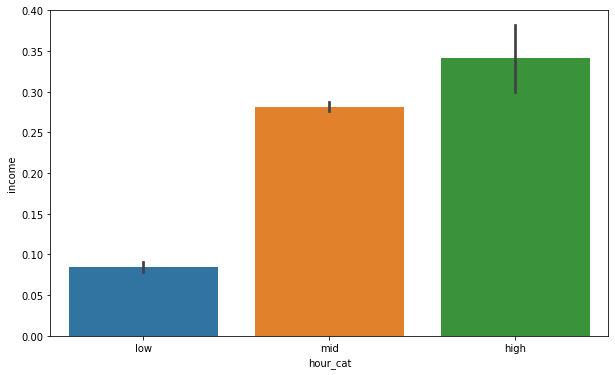

In [19]:
def hour_category(hours_per_week):
    cat = ''
    if hours_per_week<=35: cat = 'low'
    elif hours_per_week<= 70: cat = 'mid'
    else : cat= 'high'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['low','mid','high']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
adult_df['hour_cat'] = adult_df['hours-per-week'].apply(lambda x : hour_category(x))
sns.barplot(x='hour_cat', y = 'income', data=adult_df, order=group_names)
adult_df.drop('hour_cat', axis=1, inplace=True)

<AxesSubplot:xlabel='education-num', ylabel='income'>

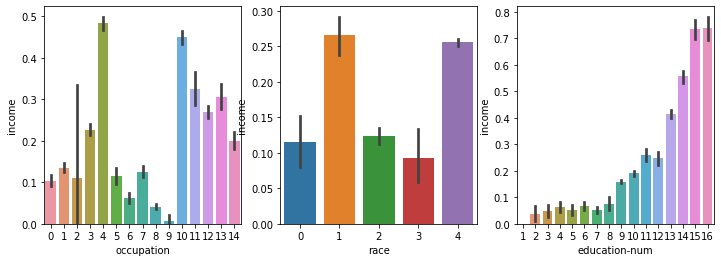

In [20]:
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot(x='occupation', y = 'income', data=adult_df)
plt.subplot(132)
sns.barplot(x='race', y = 'income', data=adult_df)
plt.subplot(133)
sns.barplot(x='education-num', y = 'income', data=adult_df)

<AxesSubplot:xlabel='relationship', ylabel='income'>

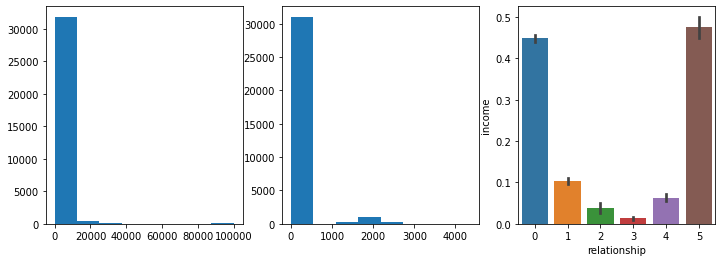

In [21]:
plt.figure(figsize=[12,4])
plt.subplot(131)
plt.hist(adult_df['capital-gain'], bins=8)
plt.subplot(132)
plt.hist(adult_df['capital-loss'], bins=8)
plt.subplot(133)
sns.barplot(x='relationship', y = 'income', data=adult_df)

In [22]:
zero_features = ['capital-gain','capital-loss']

# 전체 데이터 건수
total_count = adult_df['capital-gain'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count =adult_df[adult_df[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

capital-gain 0 건수는 29849, 퍼센트는 91.67 %
capital-loss 0 건수는 31042, 퍼센트는 95.33 %


In [23]:
# 인덱싱으로 age 컬럼부터 연속해서 native-country 까지의 열을 가져올 수 있음.
X=adult_df.loc[:,'age':'native-country']
y=adult_df.loc[:,'income']

## 평가지표

#### 오차행렬, 정확도, 정밀도, 재현율

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 배웠던 평가지표를 구현하는 함수
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [26]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_test, y_test)))
print()
pred=clf.predict(X_test)
get_clf_eval(y_test , pred)

훈련 세트 정확도: 0.864
테스트 세트 정확도: 0.838

오차 행렬
[[5724  435]
 [ 885 1097]]
정확도: 0.8379, 정밀도: 0.7161, 재현율: 0.5535,    F1: 0.6244, AUC:0.7414


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [28]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = adult_df.iloc[:, :-1]
y = adult_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

오차 행렬
[[4662  283]
 [1058  510]]
정확도: 0.7941, 정밀도: 0.6431, 재현율: 0.3253,    F1: 0.4320, AUC:0.6340


c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 임계값의 변경에 따른 정밀도-재현율 변화 곡선을 그림

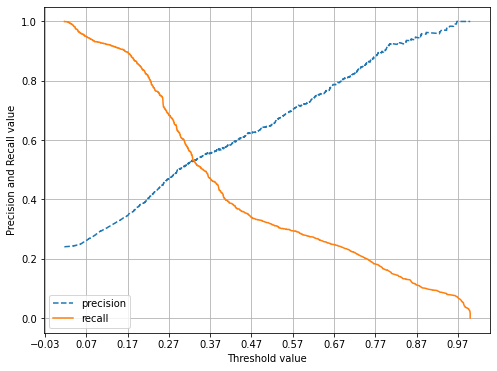

In [29]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

#### 임계값에 따른 정확도, 정밀도, 재현율, F1, AUC 

In [30]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)
        
thresholds = [0.25 , 0.3 , 0.35, 0.4]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임계값: 0.25
오차 행렬
[[3466 1479]
 [ 392 1176]]
정확도: 0.7127, 정밀도: 0.4429, 재현율: 0.7500,    F1: 0.5570, AUC:0.7255
임계값: 0.3
오차 행렬
[[4016  929]
 [ 615  953]]
정확도: 0.7629, 정밀도: 0.5064, 재현율: 0.6078,    F1: 0.5525, AUC:0.7100
임계값: 0.35
오차 행렬
[[4287  658]
 [ 780  788]]
정확도: 0.7792, 정밀도: 0.5450, 재현율: 0.5026,    F1: 0.5229, AUC:0.6847
임계값: 0.4
오차 행렬
[[4457  488]
 [ 911  657]]
정확도: 0.7852, 정밀도: 0.5738, 재현율: 0.4190,    F1: 0.4843, AUC:0.6602


In [31]:
binarizer = Binarizer(threshold=0.35)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048)

오차 행렬
[[4287  658]
 [ 780  788]]
정확도: 0.7792, 정밀도: 0.5450, 재현율: 0.5026,    F1: 0.5229, AUC:0.6847


#### ROC AUC

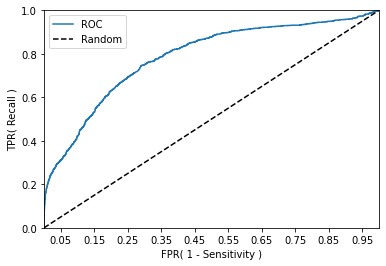

In [32]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test,lr_clf.predict_proba(X_test)[:, 1] )

## 분류기

#### Random Forest

In [33]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.8449


In [34]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.8598


In [35]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=20, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.8575


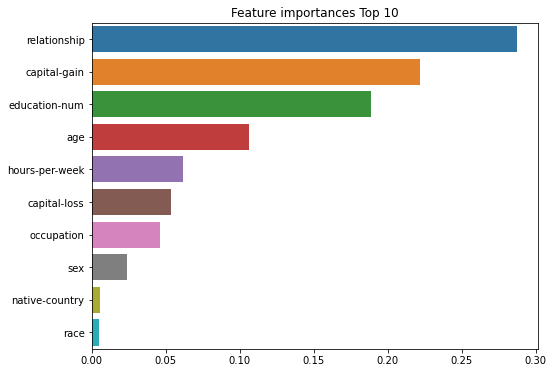

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top10 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10 , y = ftr_top10.index)
plt.show()

#### SVM

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.8565945033010901


#### 로지스틱 회귀

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = adult_df[['age', 'education-num', 'occupation', 'race', 'sex', 'capital-gain',
                 'capital-loss', 'hours-per-week', 'native-country','relationship']]  #변수 지정
y = adult_df[['income']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(x_train, y_train) #모델의 정확도 확인
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))

학습용 데이터셋 정확도 : 0.80
검증용 데이터셋 정확도 : 0.79


In [40]:
# 모형 성능평가
from sklearn.metrics import classification_report
y_pred=log.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4916
           1       0.64      0.30      0.41      1597

    accuracy                           0.79      6513
   macro avg       0.72      0.62      0.64      6513
weighted avg       0.76      0.79      0.76      6513



In [41]:
import statsmodels.api as sm
logit = sm.Logit(adult_df[['income']],x) #로지스틱 회귀분석 시행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.445550
         Iterations 8


In [42]:
np.exp(result.params)

age               1.005411
education-num     1.156751
occupation        0.986283
race              0.734801
sex               0.987446
capital-gain      1.000328
capital-loss      1.000710
hours-per-week    1.002812
native-country    0.909626
relationship      0.605562
dtype: float64

#### 결정트리

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(max_depth = 4)

X=adult_df.loc[:,'age':'native-country']
y=adult_df.loc[:,'income']

X_train , X_test , y_train , y_test = train_test_split(X, y,
                                                       test_size=0.2, random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4)

In [44]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names='income' , \
feature_names = ['age', 'education-num', 'occupation', 'race', 'sex', 'capital-gain',
                 'capital-loss', 'hours-per-week', 'native-country','relationship'], impurity=True, filled=True)

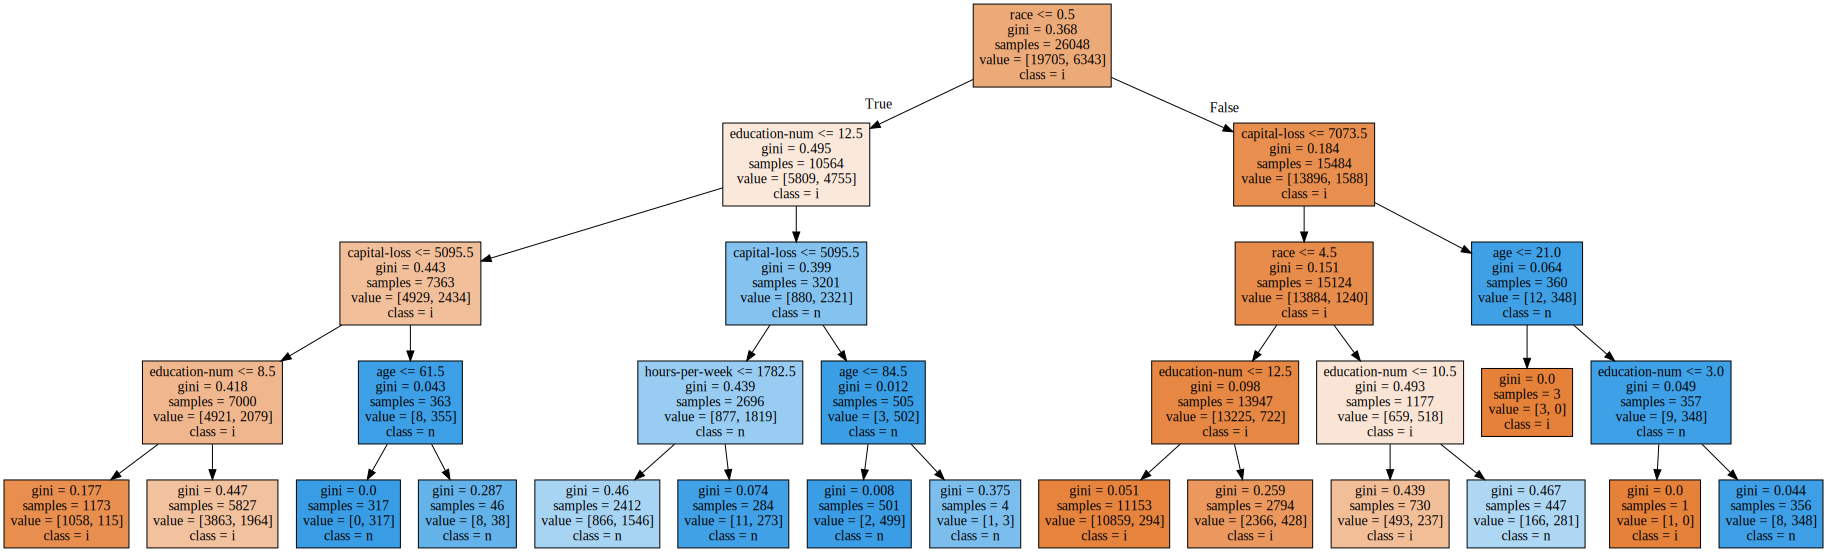

In [45]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)